In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations, permutations
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

1.  Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [2]:
wheel = np.array([0,32,15,19,4,21,2,25,17,34,6,27,13,36,11,30,8,23,10,5,24,16,33,1,20,14,31,9,22,18,29,7,28,12,35,3,26])
def roulette (n_spins=1):
    for i in range(n_spins):
        cell = np.random.choice(wheel)
        if cell == 0:
            yield (cell, 'green')
        else:
            yield (cell, 'black') if np.where(wheel == cell)[0][0] % 2 == 0 else (cell, 'red')

for item in roulette(5):
    print(item)

(16, 'red')
(6, 'black')
(28, 'black')
(23, 'red')
(22, 'black')


2.
- Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [3]:
def prob_freq(n_try=500, sum_check=3, verbose=True):
    l = []
    prob_sum = 0
    
    for item in roulette(n_try):
        l.append(item[0])
    cnt = Counter(l)
    
    if verbose:
        for num in wheel:
            print(f'Cell:{num:>3} have freq: {cnt[num]:>3}; prob calc: {cnt[num] / n_try:.3f}; prob ref: {1/len(wheel):.3f}; diff: {abs(1/len(wheel) - cnt[num] / n_try):.3f}')
            
    for _ in range(sum_check):
        _digit = np.random.choice(wheel)
        prob_sum += cnt[_digit] / n_try
    print(f'Sum of {sum_check} probabilities calculated: {prob_sum}; ref {sum_check/len(wheel)}')

    
prob_freq(10000, 7, False)


Sum of 7 probabilities calculated: 0.1853; ref 0.1891891891891892


- Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9 

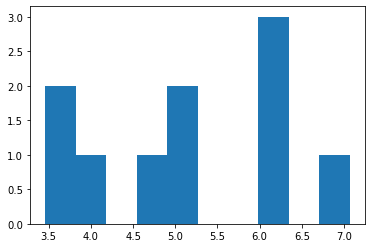

In [4]:
x = np.random.rand(10, 10)
sum_x = [sum(item) for item in x]
plt.hist(sum_x, bins=10)
plt.show()

3. 
- Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.  

$$ P_n(k) = C_k^n\frac{1}{2^n} $$  

$$ C_k^n = \frac{n!}{k!(n!-k!)} $$

In [5]:
def bin_prob(n, k):
    c_k = np.math.factorial(n)/(np.math.factorial(k)*(np.math.factorial(n - k)))
    return c_k * (1 / (2 ** n))
    

k, n = 0, 1000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k += 1

print(bin_prob(4, 2))
print(k, n, k/n)

0.375
386 1000 0.386



- Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [6]:
n_arr = [7, 10, 15, 20]
k_arr = [1, 3, 5, 7]

for i in n_arr:
    for j in k_arr:
        print(f'n={i:>3} k={j} prob={bin_prob(i, j):.3f}')

n=  7 k=1 prob=0.055
n=  7 k=3 prob=0.273
n=  7 k=5 prob=0.164
n=  7 k=7 prob=0.008
n= 10 k=1 prob=0.010
n= 10 k=3 prob=0.117
n= 10 k=5 prob=0.246
n= 10 k=7 prob=0.117
n= 15 k=1 prob=0.000
n= 15 k=3 prob=0.014
n= 15 k=5 prob=0.092
n= 15 k=7 prob=0.196
n= 20 k=1 prob=0.000
n= 20 k=3 prob=0.001
n= 20 k=5 prob=0.015
n= 20 k=7 prob=0.074


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [7]:
perm_list = []
for p in permutations("0123456",4):
    perm_list.append(''.join(str(x) for x in p))
len(perm_list)

840

In [8]:
comb_list = []
for p in combinations("0123456",4):
    comb_list.append(''.join(p))
len(comb_list)

35

5. Дополните код расчетом коэффициента корреляции x и y по формуле  

$$ R = \frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}} $$

$$ y = ax+b $$

$$ a = \frac{\sum x_i\sum y_i-n\sum x_iy_i}{(\sum x_i)^2-n\sum x_i^2} $$  
$$ b = \frac{\sum y_i-a\sum x_i}{n} $$

0.9939619654797421


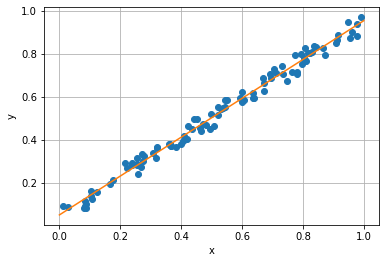

In [24]:
n = 100
r = 0.9
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

x_m = np.sum(x)/len(x)
y_m = np.sum(y)/len(y)
x_x = x - x_m
y_y = y - y_m

corr = np.sum(x_x*y_y)/np.sqrt(np.sum(x_x**2)*(np.sum(y_y**2)))
print(corr)

plt.plot([0, 1], [b, a + b])
plt.show()